**BREAST CANCER**

1. Data prepararion

In [1]:
from sklearn import datasets

In [2]:
data_breast_cancer = datasets.load_breast_cancer(as_frame=False)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
X = data_breast_cancer["data"][:, (3, 4)]
y = data_breast_cancer["target"]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

2. LinearSVC with scaling

In [5]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf_scale = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf_scale.fit(X_train, y_train)

C:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
y_train_pred_scale = svm_clf_scale.predict(X_train)
y_test_pred_scale = svm_clf_scale.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

train_accuracy_scale = accuracy_score(y_train, y_train_pred_scale)
test_accuracy_scale = accuracy_score(y_test, y_test_pred_scale)

In [8]:
train_accuracy_scale

0.8879120879120879

In [9]:
test_accuracy_scale

0.956140350877193

3. Linear SVC without scaling

In [10]:
svm_clf = Pipeline([
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X_train, y_train)

C:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [11]:
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

In [12]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [13]:
train_accuracy

0.3802197802197802

In [14]:
test_accuracy

0.35964912280701755

In [15]:
bc_acc = [train_accuracy, test_accuracy, train_accuracy_scale, test_accuracy_scale]
bc_acc

[0.3802197802197802,
 0.35964912280701755,
 0.8879120879120879,
 0.956140350877193]

In [16]:
import pickle

open_file = open("bc_acc.pkl", "wb")
pickle.dump(bc_acc, open_file)
open_file.close()

**IRIS**

1. Data preparation

In [17]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [18]:
X_iris = iris["data"][:, (2,3)]
y_iris = (iris["target"] == 2).astype(np.int8)

In [19]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(X_iris, y_iris, test_size=0.2)

2. Linear SVM with scaling

In [20]:
svm_clf_scale_iris = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf_scale_iris.fit(Xi_train, yi_train)

C:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [21]:
y_train_pred_scale_i = svm_clf_scale_iris.predict(Xi_train)
y_test_pred_scale_i = svm_clf_scale_iris.predict(Xi_test)

In [22]:
train_accuracy_scale_i = accuracy_score(yi_train, y_train_pred_scale_i)
test_accuracy_scale_i = accuracy_score(yi_test, y_test_pred_scale_i)

In [23]:
train_accuracy_scale_i

0.9583333333333334

In [24]:
test_accuracy_scale_i

0.9666666666666667

3. Linear SVM without scaling

In [25]:
svm_clf_iris = Pipeline([
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf_iris.fit(Xi_train, yi_train)

C:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [26]:
y_train_pred_i = svm_clf_iris.predict(Xi_train)
y_test_pred_i = svm_clf_iris.predict(Xi_test)

In [27]:
train_accuracy_i = accuracy_score(yi_train, y_train_pred_i)
test_accuracy_i = accuracy_score(yi_test, y_test_pred_i)

In [28]:
train_accuracy_i

0.95

In [29]:
test_accuracy_i

0.9666666666666667

In [30]:
iris_acc = [train_accuracy_i, test_accuracy_i, train_accuracy_scale_i, test_accuracy_scale_i]
iris_acc

[0.95, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667]

In [31]:
open_file = open("iris_acc.pkl", "wb")
pickle.dump(iris_acc, open_file)
open_file.close()

**REGRESSION**

<Axes: xlabel='x', ylabel='y'>

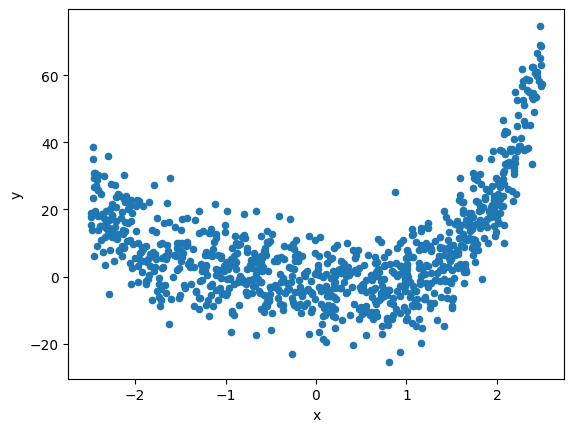

In [32]:
import pandas as pd

size = 900
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR

polynomial_svr_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
    ("scaler", StandardScaler()),
    ("svr", LinearSVR())
])

polynomial_svr_clf.fit(X_train, y_train)

C:\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()), ('svr', LinearSVR())])

In [36]:
y_train_pred = polynomial_svr_clf.predict(X_train)
y_test_pred = polynomial_svr_clf.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [38]:
train_mse

61.82890528916229

In [39]:
test_mse

69.43563025170863

In [40]:
from sklearn.svm import SVR

poly_kernel_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVR(kernel="poly", degree=4))
])

poly_kernel_svr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVR(degree=4, kernel='poly'))])

In [41]:
y_train_pred_kernel = poly_kernel_svr.predict(X_train)
y_test_pred_kernel = poly_kernel_svr.predict(X_test)
train_mse_kernel = mean_squared_error(y_train, y_train_pred_kernel)
test_mse_kernel = mean_squared_error(y_test, y_test_pred_kernel)

In [42]:
train_mse_kernel

136.9304928404214

In [43]:
test_mse_kernel

137.5944908089906

Best hiperparameters

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "svm_clf__coef0":  [0.1, 1, 10],
    "svm_clf__C" :  [0.1, 1, 10]
}

search = GridSearchCV(poly_kernel_svr,
    param_grid,
    scoring="neg_mean_squared_error",
    n_jobs=-1)

X = X.reshape(-1, 1)
search.fit(X, y)

print(f"Cross-validated neg mean squared error = {search.best_score_}")
print(search.best_params_)

Cross-validated neg mean squared error = -62.8225294951164
{'svm_clf__C': 1, 'svm_clf__coef0': 1}


In [45]:
poly_grid_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVR(kernel="poly", coef0=1, C=10))
])

poly_grid_svr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVR(C=10, coef0=1, kernel='poly'))])

In [46]:
y_train_pred_grid = poly_grid_svr.predict(X_train)
y_test_pred_grid = poly_grid_svr.predict(X_test)
train_mse_grid = mean_squared_error(y_train, y_train_pred_grid)
test_mse_grid = mean_squared_error(y_test, y_test_pred_grid)

In [47]:
train_mse_grid

70.75015355971023

In [48]:
test_mse_grid

74.7454883210756

In [49]:
reg_mse = [train_mse, test_mse, train_mse_grid, test_mse_grid]
reg_mse

[61.82890528916229, 69.43563025170863, 70.75015355971023, 74.7454883210756]

In [50]:
open_file = open("reg_mse.pkl", "wb")
pickle.dump(reg_mse, open_file)
open_file.close()